**Akshat Aggarwal**

**E22CSEU0020**

**Loading Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

**Loading The Dataset**

**Question:-1**

In [2]:
df=pd.read_csv("Item_dataset.csv")

In [3]:
df

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


**Q1.(a)**

In [4]:
# Read the CSV file with comma-separated values into a DataFrame
df = pd.read_csv("Item_dataset.csv", header=None)

# Split the values in each row based on commas and expand them into separate columns
df_separated = df[0].str.split(",", expand=True)

# Display the resulting DataFrame
df_separated

,0,1,2,3
0,MILK,BREAD,BISCUIT,None
1,BREAD,MILK,BISCUIT,CORNFLAKES
2,BREAD,TEA,BOURNVITA,None
3,JAM,MAGGI,BREAD,MILK
4,MAGGI,TEA,BISCUIT,None
5,BREAD,TEA,BOURNVITA,None
6,MAGGI,TEA,CORNFLAKES,None
7,MAGGI,BREAD,TEA,BISCUIT
8,JAM,MAGGI,BREAD,TEA
9,BREAD,MILK,None,None


In [5]:
df_separated.isnull().sum()

0     0
1     0
2     1
3    13
dtype: int64

In [6]:
df_separated=df_separated.dropna()

In [7]:
df_separated

,0,1,2,3
1,BREAD,MILK,BISCUIT,CORNFLAKES
3,JAM,MAGGI,BREAD,MILK
7,MAGGI,BREAD,TEA,BISCUIT
8,JAM,MAGGI,BREAD,TEA
10,COFFEE,COCK,BISCUIT,CORNFLAKES
11,COFFEE,COCK,BISCUIT,CORNFLAKES
19,TEA,MILK,COFFEE,CORNFLAKES


In [8]:
df_separated = df_separated.drop(columns=[0])
transactions = df_separated.values.tolist()
print(transactions)

[['MILK', 'BISCUIT', 'CORNFLAKES'], ['MAGGI', 'BREAD', 'MILK'], ['BREAD', 'TEA', 'BISCUIT'], ['MAGGI', 'BREAD', 'TEA'], ['COCK', 'BISCUIT', 'CORNFLAKES'], ['COCK', 'BISCUIT', 'CORNFLAKES'], ['MILK', 'COFFEE', 'CORNFLAKES']]


**Q1.(b)**

In [9]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

,BISCUIT,BREAD,COCK,COFFEE,CORNFLAKES,MAGGI,MILK,TEA
0,True,False,False,False,True,False,True,False
1,False,True,False,False,False,True,True,False
2,True,True,False,False,False,False,False,True
3,False,True,False,False,False,True,False,True
4,True,False,True,False,True,False,False,False
5,True,False,True,False,True,False,False,False
6,False,False,False,True,True,False,True,False


**Q2.(a)**

In [10]:
#Apriori
frequent_items = apriori(df_encoded, min_support=0.20, use_colnames=True)
frequent_items

,support,itemsets
0,0.571429,(BISCUIT)
1,0.428571,(BREAD)
2,0.285714,(COCK)
3,0.571429,(CORNFLAKES)
4,0.285714,(MAGGI)
5,0.428571,(MILK)
6,0.285714,(TEA)
7,0.285714,"(COCK, BISCUIT)"
8,0.428571,"(CORNFLAKES, BISCUIT)"
9,0.285714,"(MAGGI, BREAD)"


**Q2.(b)**

In [11]:
#Association rule
association_rules_df = association_rules(frequent_items, metric="confidence", min_threshold=0.5)
association_rules_df


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(COCK),(BISCUIT),0.285714,0.571429,0.285714,1.000000,1.750000,0.122449,inf,0.600000
1,(BISCUIT),(COCK),0.571429,0.285714,0.285714,0.500000,1.750000,0.122449,1.428571,1.000000
2,(CORNFLAKES),(BISCUIT),0.571429,0.571429,0.428571,0.750000,1.312500,0.102041,1.714286,0.555556
3,(BISCUIT),(CORNFLAKES),0.571429,0.571429,0.428571,0.750000,1.312500,0.102041,1.714286,0.555556
4,(MAGGI),(BREAD),0.285714,0.428571,0.285714,1.000000,2.333333,0.163265,inf,0.800000
5,(BREAD),(MAGGI),0.428571,0.285714,0.285714,0.666667,2.333333,0.163265,2.142857,1.000000
6,(TEA),(BREAD),0.285714,0.428571,0.285714,1.000000,2.333333,0.163265,inf,0.800000
7,(BREAD),(TEA),0.428571,0.285714,0.285714,0.666667,2.333333,0.163265,2.142857,1.000000
8,(COCK),(CORNFLAKES),0.285714,0.571429,0.285714,1.000000,1.750000,0.122449,inf,0.600000
9,(CORNFLAKES),(COCK),0.571429,0.285714,0.285714,0.500000,1.750000,0.122449,1.428571,1.000000


**Q2.(c)**

In [12]:
# Antecedent, consequent supports for each item.
lift_association_rules_df = association_rules(frequent_items, metric="lift", min_threshold=0.65)
lift_association_rules_df[['antecedents', 'consequents', 'support']]

,antecedents,consequents,support
0,(COCK),(BISCUIT),0.285714
1,(BISCUIT),(COCK),0.285714
2,(CORNFLAKES),(BISCUIT),0.428571
3,(BISCUIT),(CORNFLAKES),0.428571
4,(MAGGI),(BREAD),0.285714
5,(BREAD),(MAGGI),0.285714
6,(TEA),(BREAD),0.285714
7,(BREAD),(TEA),0.285714
8,(COCK),(CORNFLAKES),0.285714
9,(CORNFLAKES),(COCK),0.285714


**Q3.(a)**

**Loading the Dataset**

In [13]:
retail_df = pd.read_csv('retail_dataset.csv')
retail_df = retail_df.fillna(0)

In [14]:
# Converting to binary format
unique_items = set()
for col in retail_df.columns:
    unique_items.update(retail_df[col].unique())
binary_df = pd.DataFrame(index=retail_df.index)
for item in unique_items:
    binary_df[item] = retail_df.apply(lambda row: 1 if item in row.values else 0, axis=1)
print("Binary Presentation:")
binary_df

Binary Presentation:


,0,Bread,Wine,Bagel,Pencil,Milk,Eggs,Meat,Diaper,Cheese
0,0,1,1,0,1,0,1,1,1,1
1,0,1,1,0,1,1,0,1,1,1
2,1,0,1,0,0,1,1,1,0,1
3,1,0,1,0,0,1,1,1,0,1
4,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
310,1,1,0,0,0,0,1,0,0,1
311,1,0,0,0,1,1,0,1,0,0
312,0,1,1,0,1,0,1,1,1,1
313,1,0,0,0,0,0,0,1,0,1


**Q3.(b)**

In [15]:
#Frequent itemsets
frequent_itemsets = apriori(binary_df, min_support=0.2, use_colnames=True)
print("\nFrequent Itemsets:")
frequent_itemsets.head()


Frequent Itemsets:


C:\Users\akagg\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.869841,(0)
1,0.504762,(Bread)
2,0.438095,(Wine)
3,0.425397,(Bagel)
4,0.361905,(Pencil)


**Q3.(c)**

In [16]:
#Antecedents and consequents of association rules
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("\nAssociation Rules:")
association_rules_df.head()


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(0),0.504762,0.869841,0.396825,0.786164,0.903801,-0.042237,0.608683,-0.176903
1,(Wine),(0),0.438095,0.869841,0.317460,0.724638,0.833069,-0.063613,0.472682,-0.262869
2,(Bagel),(0),0.425397,0.869841,0.336508,0.791045,0.909413,-0.033520,0.622902,-0.147743
3,(Pencil),(0),0.361905,0.869841,0.266667,0.736842,0.847100,-0.048133,0.494603,-0.220499
4,(Milk),(0),0.501587,0.869841,0.409524,0.816456,0.938626,-0.026778,0.709141,-0.115976


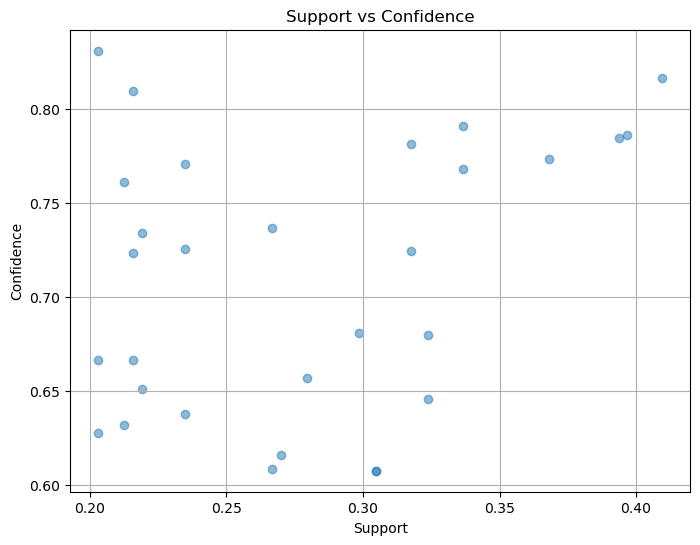

In [17]:
# Scatter plot support vs confidence
plt.figure(figsize=(8, 6))
plt.scatter(association_rules_df['support'], association_rules_df['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.grid(True)
plt.show()